<a href="https://colab.research.google.com/github/mpiatek26/Bitcoin_Price_Prediction_with_FB_Prophet/blob/main/Bitcoin_Price_Prediction_with_FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

In [2]:
BTC = pd.read_csv('bitcoin.csv')
BTC.head(2)

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin


In [3]:
BTC.shape

(3232, 5)

In [4]:
BTC.tail(2)

,date,price,total_volume,market_cap,coin_name
3230,2023-11-06 00:00:00.000,35061.928749,1.279678e+10,6.846474e+11,bitcoin
3231,2023-11-07 00:00:00.000,35031.268882,1.271735e+10,6.836445e+11,bitcoin


In [5]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3232 non-null   object 
 1   price         3232 non-null   float64
 2   total_volume  3232 non-null   float64
 3   market_cap    3231 non-null   float64
 4   coin_name     3232 non-null   object 
dtypes: float64(3), object(2)
memory usage: 126.4+ KB


In [6]:
BTC.isnull().sum()

date            0
price           0
total_volume    0
market_cap      1
coin_name       0
dtype: int64

In [7]:
# convert the 'Date' column to datetime format
BTC['date']= pd.to_datetime(BTC['date'])

In [8]:
start_date = '2019-01-01'
BTC = BTC.loc[BTC['date'] >= start_date].copy()

In [9]:
BTC.shape

(1772, 5)

In [10]:
# Renaming the columns names
BTC.rename(columns = {'date':'ds', 'price':'y'}, inplace = True)
BTC.head(2)

,ds,y,total_volume,market_cap,coin_name
1460,2019-01-01,3692.531566,2.991428e+09,6.442264e+10,bitcoin
1461,2019-01-02,3794.264254,2.689878e+09,6.618845e+10,bitcoin


In [11]:
from statsmodels.tsa.stattools import adfuller

btc_price_vol = BTC[['y', 'total_volume']]
btc_price_vol.head()

,y,total_volume
1460,3692.531566,2.991428e+09
1461,3794.264254,2.689878e+09
1462,3872.172184,3.263469e+09
1463,3776.525808,2.261200e+09
1464,3815.268080,2.950055e+09


In [12]:
result = adfuller(btc_price_vol.y.values, autolag='AIC')

print(f'ADF Statistic: {result[0]}')

print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.6275898456208213
p-value: 0.46875253431269953
Critial Values:
   1%, -3.4340730634421153
Critial Values:
   5%, -2.8631845252929495
Critial Values:
   10%, -2.5676454956964605


In [13]:
model = Prophet(interval_width=0.8)
# business forecast tasks training
model.fit(BTC)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp28k7r9ck/0i_i0h0b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp28k7r9ck/z9xfzyn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59851', 'data', 'file=/tmp/tmp28k7r9ck/0i_i0h0b.json', 'init=/tmp/tmp28k7r9ck/z9xfzyn5.json', 'output', 'file=/tmp/tmp28k7r9ck/prophet_modeli2skf494/prophet_model-20231107190252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:02:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:02:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
future = model.make_future_dataframe(periods=2, freq='M')


In [15]:
# Let us now use this dataset to make predictions for the future using the model.

forecast = model.predict(future)

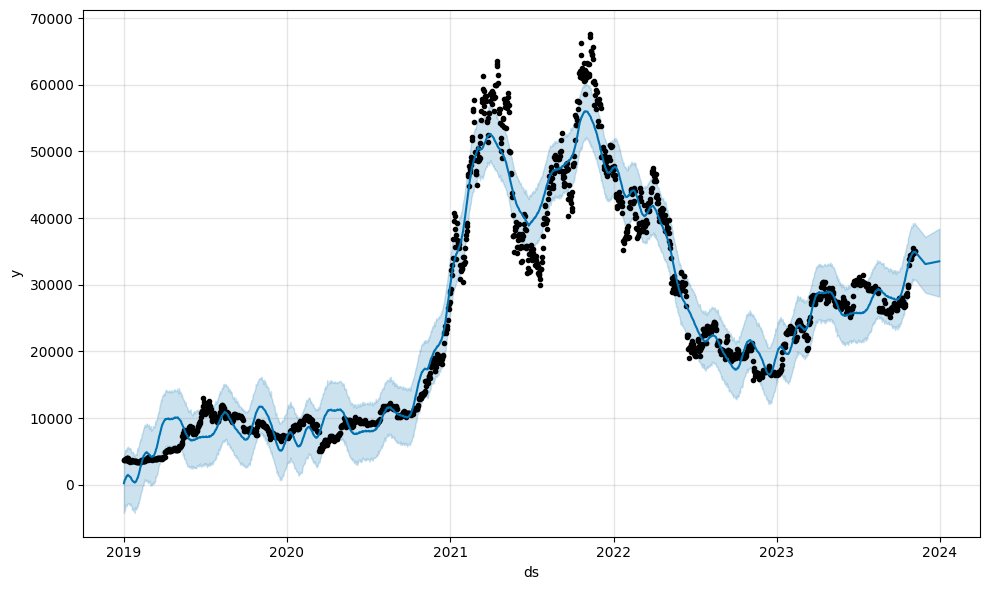

In [16]:
# visualizing time series analysis
fig1 = model.plot(forecast)

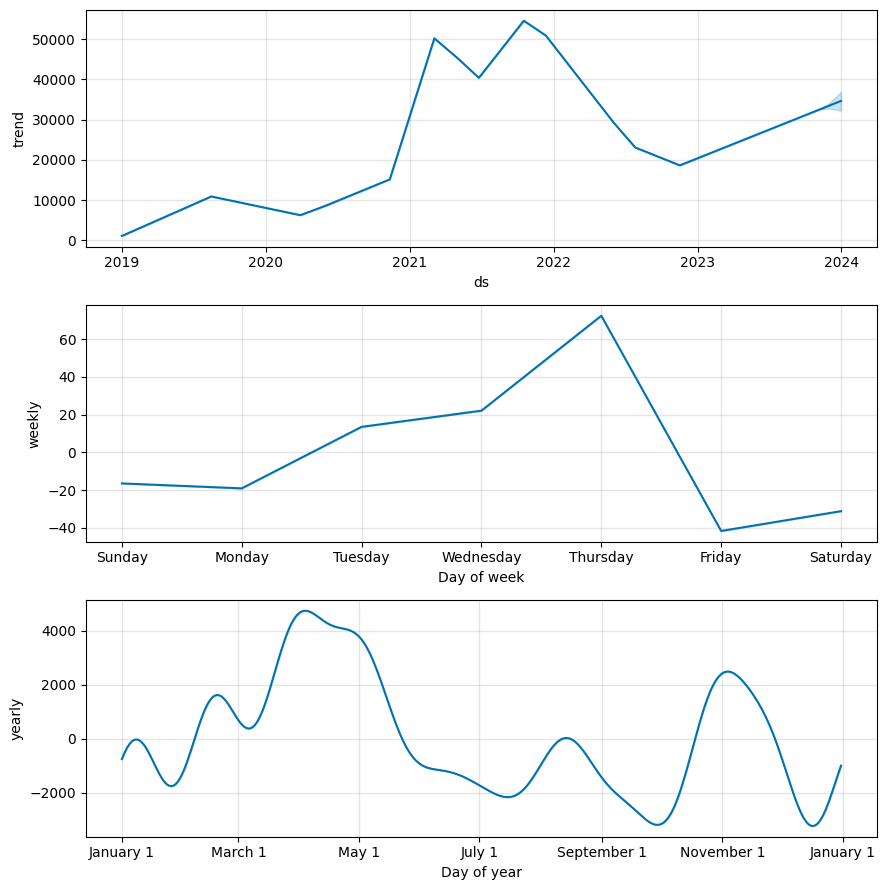

In [17]:
fig2 = model.plot_components(forecast)

In [18]:
BTC['cap'] = 80000

In [19]:
# confidence interval of 50%
model_logistic = Prophet(growth='logistic', interval_width=0.5)
# fitting the model
model_logistic.fit(BTC)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp28k7r9ck/9zppmina.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp28k7r9ck/ciqip991.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94725', 'data', 'file=/tmp/tmp28k7r9ck/9zppmina.json', 'init=/tmp/tmp28k7r9ck/ciqip991.json', 'output', 'file=/tmp/tmp28k7r9ck/prophet_modelhs3l9rnp/prophet_model-20231107190503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:05:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:05:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
# forecasting for future
future = model_logistic.make_future_dataframe(periods=2, freq='M')
# carrying capacity
future['cap'] = 15000
# predictions
forecast_logistic = model_logistic.predict(future)

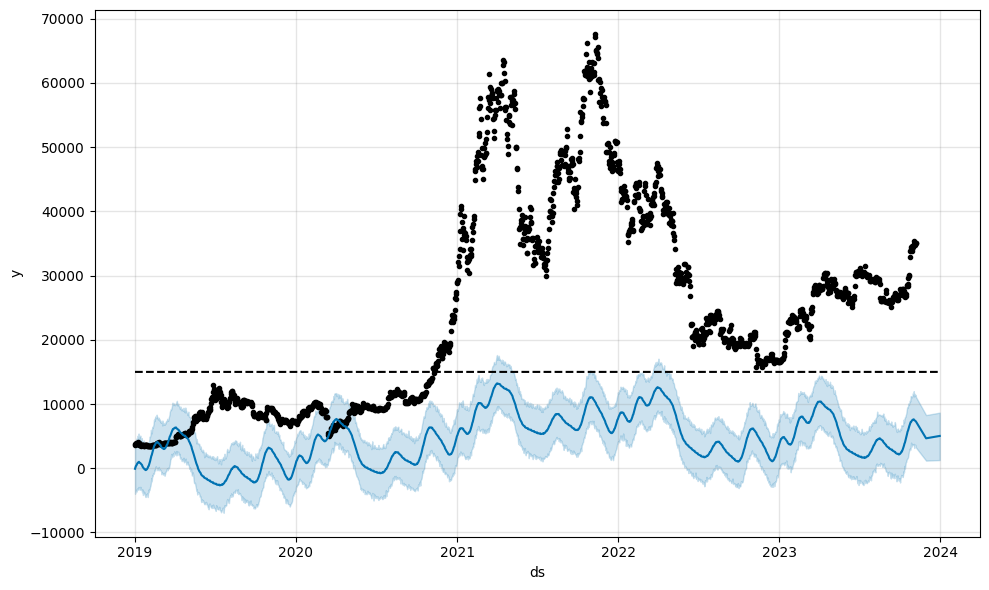

In [21]:
fig1 = model.plot(forecast_logistic)

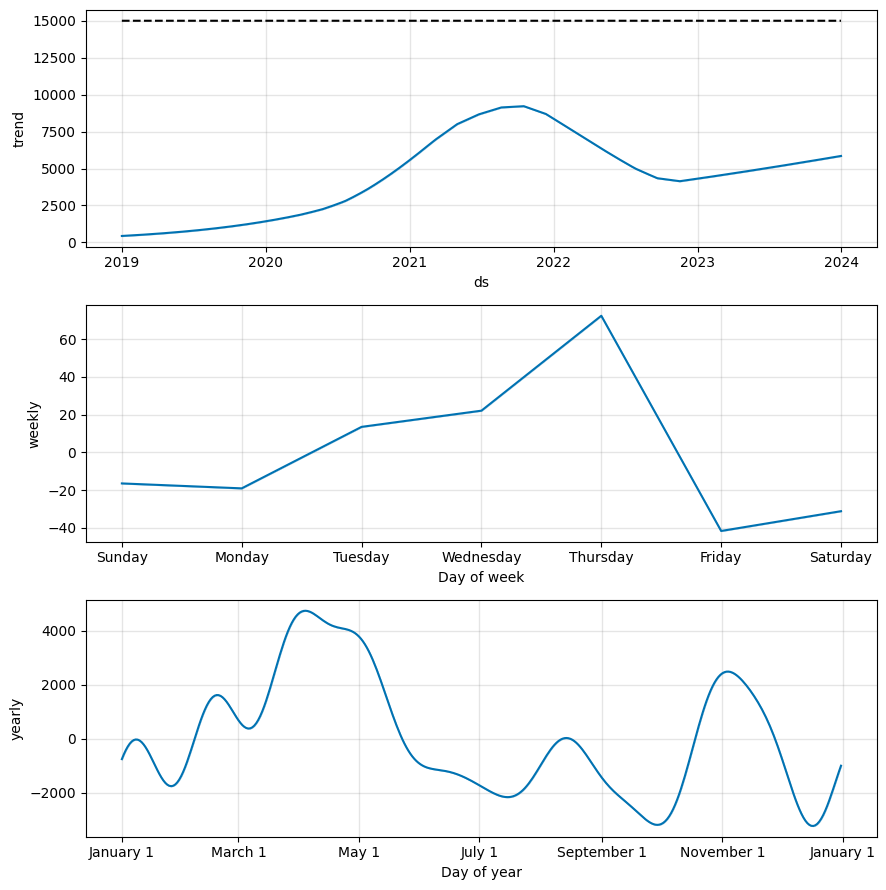

In [22]:
fig2 = model.plot_components(forecast_logistic)

In [29]:
split_date = '2023-10-24'
train_df = BTC.loc[BTC['ds'] <= split_date].copy()
test_df = BTC.loc[BTC['ds'] > split_date].copy()

In [30]:
train_df.head(2)

,ds,y,total_volume,market_cap,coin_name,cap
1460,2019-01-01,3692.531566,2.991428e+09,6.442264e+10,bitcoin,80000
1461,2019-01-02,3794.264254,2.689878e+09,6.618845e+10,bitcoin,80000


In [31]:
print(train_df.shape)
print(test_df.shape)

(1758, 6)
(14, 6)


In [32]:
# Setup and train model
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp28k7r9ck/tx_3f3m_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp28k7r9ck/8s6fm44d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92583', 'data', 'file=/tmp/tmp28k7r9ck/tx_3f3m_.json', 'init=/tmp/tmp28k7r9ck/8s6fm44d.json', 'output', 'file=/tmp/tmp28k7r9ck/prophet_modele8j15ftp/prophet_model-20231107190717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:07:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:07:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
# Predict on training set with model
data_test_fcst = model.predict(df=test_df.reset_index())

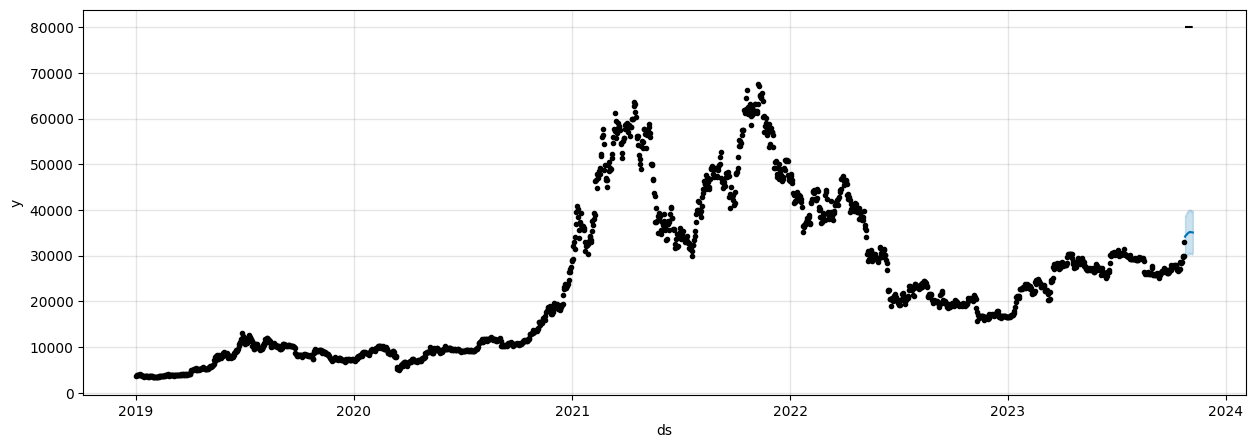

In [34]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(data_test_fcst, ax=ax)

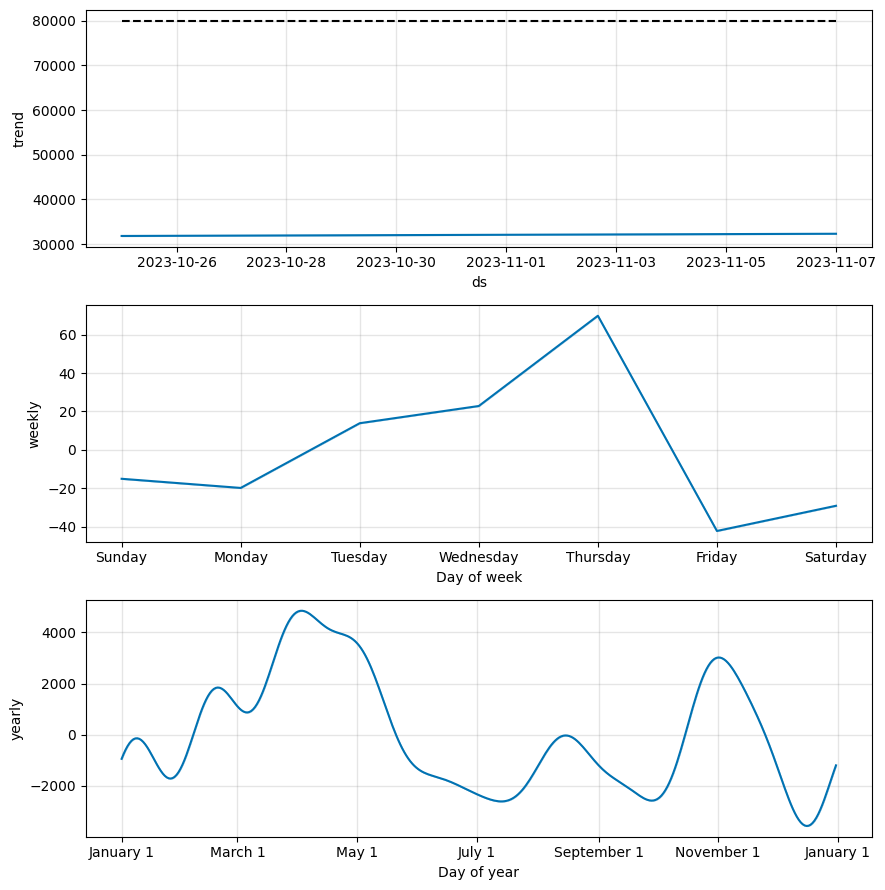

In [35]:
fig = model.plot_components(data_test_fcst)

In [36]:
test_df.head(2)
# print(test_df.index)

,ds,y,total_volume,market_cap,coin_name,cap
3218,2023-10-25,33846.724257,4.646471e+10,6.606760e+11,bitcoin,80000
3219,2023-10-26,34471.986032,2.384046e+10,6.739488e+11,bitcoin,80000


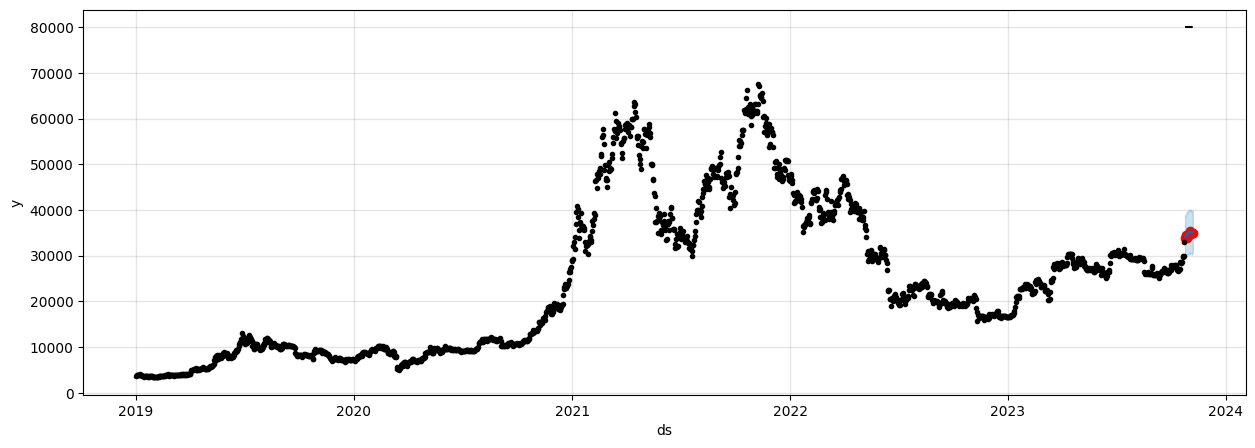

In [37]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

ax.scatter(test_df.ds, test_df['y'], color='r')

fig = model.plot(data_test_fcst, ax=ax)

In [38]:
data_test_fcst.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-10-25,31812.756291,80000,29523.285609,38831.179540,31812.756291,31812.756291,2336.043362,2336.043362,2336.043362,22.817781,22.817781,22.817781,2313.225581,2313.225581,2313.225581,0.0,0.0,0.0,34148.799653
1,2023-10-26,31850.815556,80000,29898.257811,38636.805716,31850.815556,31850.815556,2552.803738,2552.803738,2552.803738,69.863929,69.863929,69.863929,2482.939809,2482.939809,2482.939809,0.0,0.0,0.0,34403.619295
2,2023-10-27,31888.874822,80000,29778.034484,39218.649650,31888.874822,31888.874822,2587.926973,2587.926973,2587.926973,-42.324687,-42.324687,-42.324687,2630.251660,2630.251660,2630.251660,0.0,0.0,0.0,34476.801795
3,2023-10-28,31926.934088,80000,30317.964598,39621.727631,31926.934088,31926.934088,2725.027409,2725.027409,2725.027409,-29.197528,-29.197528,-29.197528,2754.224937,2754.224937,2754.224937,0.0,0.0,0.0,34651.961496
4,2023-10-29,31964.993353,80000,30311.845370,39346.567207,31964.993353,31964.993353,2839.184701,2839.184701,2839.184701,-15.120659,-15.120659,-15.120659,2854.305359,2854.305359,2854.305359,0.0,0.0,0.0,34804.178054


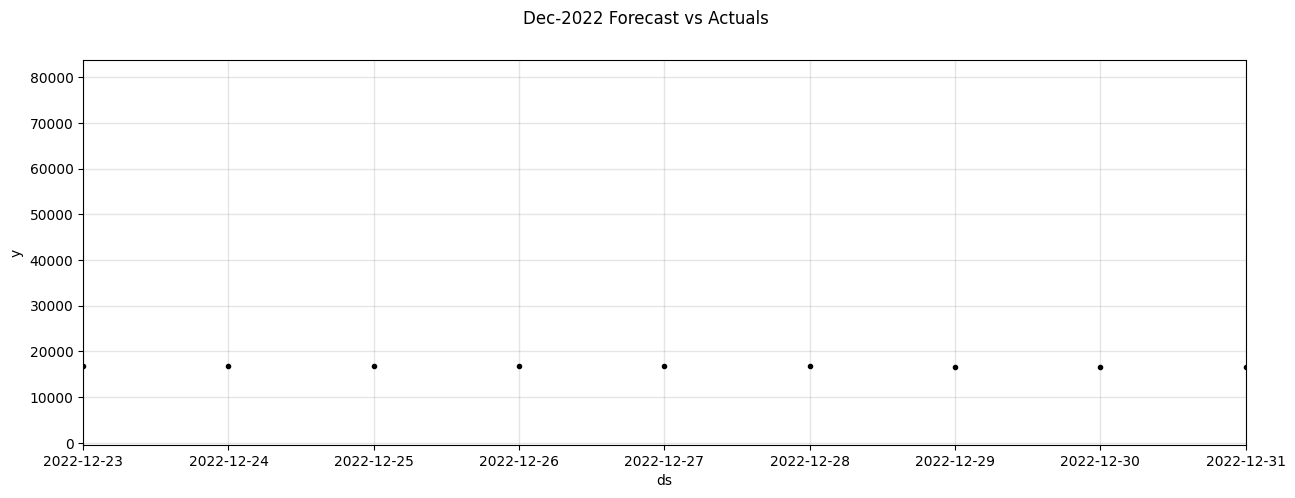

In [47]:
import datetime as dt
import matplotlib.pyplot as plt

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

# Plot actual values as red points
ax.scatter(test_df.ds, test_df['y'], color='r')

# Plot forecasted values, assuming model.plot() is valid for your model
fig = model.plot(data_test_fcst, ax=ax)

# Define the lower and upper bounds for the dates
lower = dt.datetime(2022, 12, 23)
upper = dt.datetime(2022, 12, 31)

# Set the x-axis bounds
ax.set_xlim(lower, upper)

# If you want to set a specific y-axis range, uncomment the next line and set appropriate limits
# ax.set_ylim(0, 10000)

# Set the plot title, adjusting the year to match your lower and upper bounds
plt.suptitle('Dec-2022 Forecast vs Actuals')

plt.show()  # Display the plot

In [48]:
mean_absolute_error(y_true=test_df['y'],
                   y_pred=data_test_fcst['yhat'])

319.96879963522434